Homework 3 Submission - CS498H/598H

Dr. Liu, Hood College, Spring 2019

Joshua Clemens

02/20/2019

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as Pillow
import PIL.ImageOps
import glob

Load the Fashion MNIST dataset and create model structure

In [2]:
# Load testing and training data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess image values to be in [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build model
model = keras.Sequential([
    # First layer transforms the format of images from a 2d array (of 28x28 pixels)
    # To a 1d array of 28 * 28 (784) pixels
    keras.layers.Flatten(input_shape=(28,28)),
    # Second layer (dense, fully connected) has 128 nodes (or neurons)
    keras.layers.Dense(128, activation=tf.nn.relu),
    # Third layer, softmax layer, returns an array of 10 probability scores
    #  that sum to 1
    # Each node contains a score that indicates the probability that the 
    #  current image belongs to one of the 10 classes
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Train the model against the processed data

In [3]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.5027 - acc: 0.8227
Epoch 2/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.3737 - acc: 0.8642
Epoch 3/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.3375 - acc: 0.8773
Epoch 4/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.3124 - acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.2945 - acc: 0.8909


Evaluate our model's performance by observing it's loss and accuracy against the test data

In [4]:
loss, acc = model.evaluate(test_images, test_labels)
print('Loss', loss)
print('Accuracy', acc)

10000/10000 [==============================] - 0s 39us/step
Loss 0.34754010481834413
Accuracy 0.8772


Load our test images using our 4 methods of RGB to grayscale image manipulation

1. Load each image as a grayscale image
2. Invert the image to give a white background
3. Resize the image to be 28x28
4. Convert from Pillow's Image type to a numpy array
5. Convert each value in image arrays from 1-255 to 0-1

In [5]:
imgs = []

# Load each image file found in the images/ directory
for file in glob.glob('images/*'):
    # Opens image and converts to grayscale
    image = Pillow.open(file).convert('L')
    # Invert image to give white background
    image = PIL.ImageOps.invert(image)
    imgs.append(image)

# Resize images in our list
imgs = [ x.resize((28,28)) for x in imgs ]

# Convert each Pillow image to numpy array
imgs = [ np.array(x) for x in imgs ]

# Convert each image to have volues the model is trained for
imgs = [ x/255.0 for x in imgs ]

Below there are 4 test images shown, along side a test image loaded from the dataset

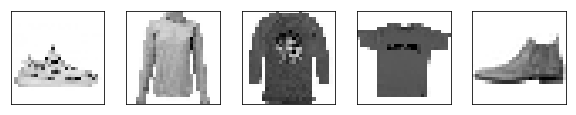

In [6]:
# Build our image plot from our 4 test images
plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imgs[i], cmap=plt.cm.binary)
# Show an example of Fashion_MNIST test image after our test images
plt.subplot(5,5,len(imgs)+1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.show()

We then test our manipulated images against our model and plot our predictions for each image.

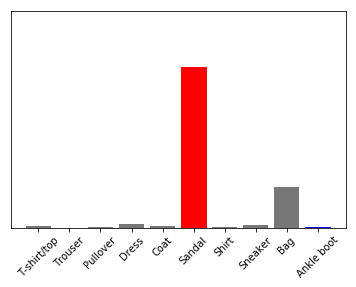

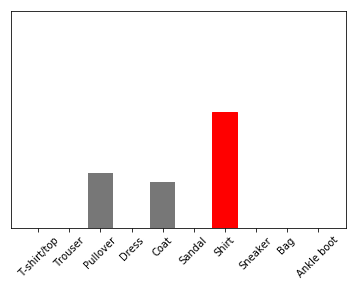

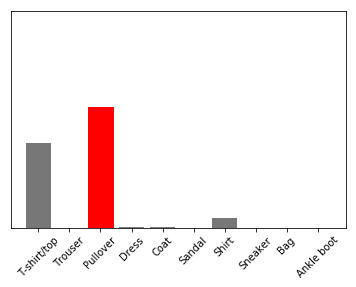

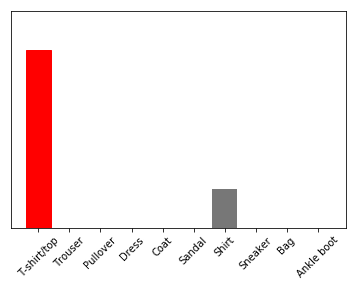

In [7]:
# Helper function to plot our predictions
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

predictions = []
for img in imgs:
  batch = (np.expand_dims(img,0))
  # Test our image against our model
  prediction = model.predict(batch)
  # Plot the output of the model's prediction
  plot_value_array(0, prediction, test_labels)
  _ = plt.xticks(range(10), class_names, rotation=45)
  plt.show()

Our model had an accuracy of 87.72% against the test data. However, It correctly predicted 25% of the 4 test images we loaded. 
The image it correctly identified was a T-Shirt/top.
It incorrectly identified a shirt as a pullover, a pullover as a shirt, and sneakers as sandals.